In [323]:
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from IPython.display import display

In [324]:
index=pd.read_excel(r'E:\大三下study\蒋志强\実験5\data\2010_2021.xlsx')
index

,指数代码_IdxCd,指数名称_IdxNm,交易日期_TrdDt,收盘价_ClPr,指数月收益率_IdxMonRet
0,1,上证指数,2010-01-29,2989.29,-0.0878
1,1,上证指数,2010-02-26,3051.94,0.0210
2,1,上证指数,2010-03-31,3109.11,0.0187
3,1,上证指数,2010-04-30,2870.61,-0.0767
4,1,上证指数,2010-05-31,2592.15,-0.0970
...,...,...,...,...,...
1579,41,上证公用,2021-08-31,2067.54,0.1198
1580,41,上证公用,2021-09-30,2609.22,0.2620
1581,41,上证公用,2021-10-29,2354.39,-0.0977
1582,41,上证公用,2021-11-30,2215.75,-0.0589


In [325]:
index.columns=['code','name','date','close','monret']
index

,code,name,date,close,monret
0,1,上证指数,2010-01-29,2989.29,-0.0878
1,1,上证指数,2010-02-26,3051.94,0.0210
2,1,上证指数,2010-03-31,3109.11,0.0187
3,1,上证指数,2010-04-30,2870.61,-0.0767
4,1,上证指数,2010-05-31,2592.15,-0.0970
...,...,...,...,...,...
1579,41,上证公用,2021-08-31,2067.54,0.1198
1580,41,上证公用,2021-09-30,2609.22,0.2620
1581,41,上证公用,2021-10-29,2354.39,-0.0977
1582,41,上证公用,2021-11-30,2215.75,-0.0589


In [326]:
index['date']=pd.to_datetime(index['date'])
index['yearmonth']=index['date'].dt.strftime('%Y%m')
index.drop(columns=['monret'],inplace=True)
index
index_new=index.pivot(index='yearmonth',columns='code',values='close')
index_new

code,1,32,33,34,35,36,37,38,39,40,41
yearmonth,,,,,,,,,,,
201001,2989.29,3013.19,2338.58,2328.31,2487.20,4325.84,3275.82,3555.01,2509.45,2457.17,1966.32
201002,3051.94,3012.64,2407.88,2378.33,2638.66,4414.94,3421.93,3627.34,2576.54,2405.64,2045.31
201003,3109.11,3064.59,2427.83,2392.62,2633.05,4348.36,3345.19,3845.23,2776.39,2304.18,2061.80
201004,2870.61,2878.92,2260.45,2207.50,2395.73,4161.42,3638.46,3449.79,2728.58,2125.24,1953.54
201005,2592.15,2513.56,2069.46,1981.80,2157.30,3981.44,3687.59,3065.19,2470.64,1847.16,1742.98
...,...,...,...,...,...,...,...,...,...,...,...
202108,3543.94,1544.61,3424.67,3111.24,3749.15,15592.87,8970.98,4730.65,4531.86,2713.74,2067.54
202109,3568.17,1699.18,3021.62,2999.62,3632.99,17203.02,9500.47,4770.62,4428.19,2585.23,2609.22
202110,3547.34,1463.15,2937.69,3101.17,3911.24,18238.92,9194.52,4820.51,4553.92,2736.45,2354.39


In [327]:
rf=pd.read_excel(r'E:\大三下study\蒋志强\実験5\data\rf.xlsx')
rf

,日期_Date,月无风险收益率_Monrfret
0,2010-01-29,0.001553
1,2010-02-26,0.001604
2,2010-03-31,0.001619
3,2010-04-30,0.001616
4,2010-05-31,0.001646
...,...,...
139,2021-08-31,0.001969
140,2021-09-30,0.001980
141,2021-10-29,0.002027
142,2021-11-30,0.002055


In [328]:
rf.columns=['date','monrfret']
rf['date']=pd.to_datetime(rf['date'])
rf['yearmonth']=rf['date'].dt.strftime('%Y%m')
rf

,date,monrfret,yearmonth
0,2010-01-29,0.001553,201001
1,2010-02-26,0.001604,201002
2,2010-03-31,0.001619,201003
3,2010-04-30,0.001616,201004
4,2010-05-31,0.001646,201005
...,...,...,...
139,2021-08-31,0.001969,202108
140,2021-09-30,0.001980,202109
141,2021-10-29,0.002027,202110
142,2021-11-30,0.002055,202111


In [329]:
index_rf=pd.merge(left=index,right=rf,on='yearmonth',how='inner')
index_rf

,code,name,date_x,close,yearmonth,date_y,monrfret
0,1,上证指数,2010-01-29,2989.29,201001,2010-01-29,0.001553
1,32,上证能源,2010-01-29,3013.19,201001,2010-01-29,0.001553
2,33,上证材料,2010-01-29,2338.58,201001,2010-01-29,0.001553
3,34,上证工业,2010-01-29,2328.31,201001,2010-01-29,0.001553
4,35,上证可选,2010-01-29,2487.20,201001,2010-01-29,0.001553
...,...,...,...,...,...,...,...
1579,37,上证医药,2021-12-31,9287.54,202112,2021-12-31,0.002079
1580,38,上证金融,2021-12-31,4780.38,202112,2021-12-31,0.002079
1581,39,上证信息,2021-12-31,4740.97,202112,2021-12-31,0.002079
1582,40,上证通信,2021-12-31,3220.39,202112,2021-12-31,0.002079


In [330]:
tempo1=pd.DataFrame
count=0
for i in index_rf['code'].unique():
    count+=1
    tempo=index_rf[index_rf['code']==i]
    tempo=tempo[['close','yearmonth','monrfret']]
    tempo.columns=['close'+str(i),'yearmonth','monrfret']
    if count==1:
        tempo1=tempo
    else:
        tempo1=pd.merge(left=tempo,right=tempo1,on=['yearmonth','monrfret'],how='inner')
tempo1

,close41,yearmonth,monrfret,close40,close39,close38,close37,close36,close35,close34,close33,close32,close1
0,1966.32,201001,0.001553,2457.17,2509.45,3555.01,3275.82,4325.84,2487.20,2328.31,2338.58,3013.19,2989.29
1,2045.31,201002,0.001604,2405.64,2576.54,3627.34,3421.93,4414.94,2638.66,2378.33,2407.88,3012.64,3051.94
2,2061.80,201003,0.001619,2304.18,2776.39,3845.23,3345.19,4348.36,2633.05,2392.62,2427.83,3064.59,3109.11
3,1953.54,201004,0.001616,2125.24,2728.58,3449.79,3638.46,4161.42,2395.73,2207.50,2260.45,2878.92,2870.61
4,1742.98,201005,0.001646,1847.16,2470.64,3065.19,3687.59,3981.44,2157.30,1981.80,2069.46,2513.56,2592.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2067.54,202108,0.001969,2713.74,4531.86,4730.65,8970.98,15592.87,3749.15,3111.24,3424.67,1544.61,3543.94
140,2609.22,202109,0.001980,2585.23,4428.19,4770.62,9500.47,17203.02,3632.99,2999.62,3021.62,1699.18,3568.17
141,2354.39,202110,0.002027,2736.45,4553.92,4820.51,9194.52,18238.92,3911.24,3101.17,2937.69,1463.15,3547.34
142,2215.75,202111,0.002055,3067.99,4783.52,4658.56,9502.19,18011.08,3764.14,2933.02,2949.79,1360.96,3563.89


In [331]:
index_rf=tempo1
index_rf

,close41,yearmonth,monrfret,close40,close39,close38,close37,close36,close35,close34,close33,close32,close1
0,1966.32,201001,0.001553,2457.17,2509.45,3555.01,3275.82,4325.84,2487.20,2328.31,2338.58,3013.19,2989.29
1,2045.31,201002,0.001604,2405.64,2576.54,3627.34,3421.93,4414.94,2638.66,2378.33,2407.88,3012.64,3051.94
2,2061.80,201003,0.001619,2304.18,2776.39,3845.23,3345.19,4348.36,2633.05,2392.62,2427.83,3064.59,3109.11
3,1953.54,201004,0.001616,2125.24,2728.58,3449.79,3638.46,4161.42,2395.73,2207.50,2260.45,2878.92,2870.61
4,1742.98,201005,0.001646,1847.16,2470.64,3065.19,3687.59,3981.44,2157.30,1981.80,2069.46,2513.56,2592.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2067.54,202108,0.001969,2713.74,4531.86,4730.65,8970.98,15592.87,3749.15,3111.24,3424.67,1544.61,3543.94
140,2609.22,202109,0.001980,2585.23,4428.19,4770.62,9500.47,17203.02,3632.99,2999.62,3021.62,1699.18,3568.17
141,2354.39,202110,0.002027,2736.45,4553.92,4820.51,9194.52,18238.92,3911.24,3101.17,2937.69,1463.15,3547.34
142,2215.75,202111,0.002055,3067.99,4783.52,4658.56,9502.19,18011.08,3764.14,2933.02,2949.79,1360.96,3563.89


In [332]:
three_factors=pd.read_excel(r'E:\大三下study\蒋志强\実験5\data\3factors.xlsx')
three_factors.columns=['date','mkt','smb','hml']
three_factors['date']=pd.to_datetime(three_factors['date'],format='%Y-%m-%d')
three_factors['yearmonth']=three_factors['date'].dt.strftime('%Y%m')
three_factors

E:\Python37\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,date,mkt,smb,hml,yearmonth
0,2010-01-29,-0.0900,0.0710,-0.0400,201001
1,2010-02-26,0.0190,0.0488,0.0018,201002
2,2010-03-31,0.0178,0.0348,0.0101,201003
3,2010-04-30,-0.0778,0.0035,-0.0433,201004
4,2010-05-31,-0.0952,0.0093,-0.0457,201005
...,...,...,...,...,...
139,2021-08-31,0.0488,0.0070,0.0832,202108
140,2021-09-30,0.0094,-0.0191,0.0488,202109
141,2021-10-29,-0.0096,-0.0051,-0.0983,202110
142,2021-11-30,-0.0025,0.1014,-0.0599,202111


In [333]:
three_factors.drop(columns=['date'],inplace=True)
index_rf_factors=pd.merge(left=index_rf,right=three_factors,on='yearmonth',how='inner')
index_rf_factors

,close41,yearmonth,monrfret,close40,close39,close38,close37,close36,close35,close34,close33,close32,close1,mkt,smb,hml
0,1966.32,201001,0.001553,2457.17,2509.45,3555.01,3275.82,4325.84,2487.20,2328.31,2338.58,3013.19,2989.29,-0.0900,0.0710,-0.0400
1,2045.31,201002,0.001604,2405.64,2576.54,3627.34,3421.93,4414.94,2638.66,2378.33,2407.88,3012.64,3051.94,0.0190,0.0488,0.0018
2,2061.80,201003,0.001619,2304.18,2776.39,3845.23,3345.19,4348.36,2633.05,2392.62,2427.83,3064.59,3109.11,0.0178,0.0348,0.0101
3,1953.54,201004,0.001616,2125.24,2728.58,3449.79,3638.46,4161.42,2395.73,2207.50,2260.45,2878.92,2870.61,-0.0778,0.0035,-0.0433
4,1742.98,201005,0.001646,1847.16,2470.64,3065.19,3687.59,3981.44,2157.30,1981.80,2069.46,2513.56,2592.15,-0.0952,0.0093,-0.0457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2067.54,202108,0.001969,2713.74,4531.86,4730.65,8970.98,15592.87,3749.15,3111.24,3424.67,1544.61,3543.94,0.0488,0.0070,0.0832
140,2609.22,202109,0.001980,2585.23,4428.19,4770.62,9500.47,17203.02,3632.99,2999.62,3021.62,1699.18,3568.17,0.0094,-0.0191,0.0488
141,2354.39,202110,0.002027,2736.45,4553.92,4820.51,9194.52,18238.92,3911.24,3101.17,2937.69,1463.15,3547.34,-0.0096,-0.0051,-0.0983
142,2215.75,202111,0.002055,3067.99,4783.52,4658.56,9502.19,18011.08,3764.14,2933.02,2949.79,1360.96,3563.89,-0.0025,0.1014,-0.0599


In [334]:
def get_rexc(index_rf_factors,rf):##这个函数用于在不停的循环中获取rexc
    p41=index_rf_factors.iloc[:,0].values
    p40=index_rf_factors.iloc[:,3].values
    p39=index_rf_factors.iloc[:,4].values
    p38=index_rf_factors.iloc[:,5].values
    p37=index_rf_factors.iloc[:,6].values
    p36=index_rf_factors.iloc[:,7].values
    p35=index_rf_factors.iloc[:,8].values
    p34=index_rf_factors.iloc[:,9].values
    p33=index_rf_factors.iloc[:,10].values
    p32=index_rf_factors.iloc[:,11].values
    r32=np.log(p32[1:])-np.log(p32[:-1])
    r33=np.log(p33[1:])-np.log(p33[:-1])
    r34=np.log(p34[1:])-np.log(p34[:-1])
    r35=np.log(p35[1:])-np.log(p35[:-1])
    r36=np.log(p36[1:])-np.log(p36[:-1])
    r38=np.log(p38[1:])-np.log(p38[:-1])
    r37=np.log(p37[1:])-np.log(p37[:-1])
    r39=np.log(p39[1:])-np.log(p39[:-1])
    r40=np.log(p40[1:])-np.log(p40[:-1])
    r41=np.log(p41[1:])-np.log(p41[:-1])
    rexc32=r32-rf[1:]
    rexc33=r33-rf[1:]
    rexc34=r34-rf[1:]
    rexc35=r35-rf[1:]
    rexc36=r36-rf[1:]
    rexc37=r37-rf[1:]
    rexc38=r38-rf[1:]
    rexc39=r39-rf[1:]
    rexc40=r40-rf[1:]
    rexc41=r41-rf[1:]
    return rexc32,rexc33,rexc34,rexc35,rexc36,rexc37,rexc38,rexc39,rexc40,rexc41

In [335]:
def get_Cov_Const(Cov_Sample):
    diagnal_average=np.mean(Cov_Sample.diagonal())
    sum_notdiag=0
    for i in range(10):
        for j in range(10):
            if i!=j:
                sum_notdiag=sum_notdiag+Cov_Sample[i,j]
    sum_notdiag
    average_notdiag=sum_notdiag/90
    Cov_Const=np.linspace(1,100,100).reshape(10,10)
    for i in range(10):
        for j in range(10):
            if i==j:
                Cov_Const[i,j]=diagnal_average
            else:
                Cov_Const[i,j]=average_notdiag
    return Cov_Const

In [336]:
def get_Cov_Sample(R):
    Cov_Sample=np.mat(np.cov(R,rowvar=False))
    return Cov_Sample

In [337]:
def get_Cov_Factor(mkt,R):
    X = np.mat(np.concatenate([np.ones((len(mkt)-1, 1)), mkt[1:, None]], axis=1))
    Y = np.mat(R)
    AB_hat = (X.T*X).I*(X.T*Y)
    ALPHA = AB_hat[0]
    BETA = AB_hat[1]
    RESD = Y - X*AB_hat
    covfactor = np.cov(mkt[1:])
    covresidual = np.diag(np.diag(np.cov(RESD, rowvar=False)))
    Cov_Factor = BETA.T*covfactor*BETA + covresidual
    return Cov_Factor

In [338]:
def get_Cov_EWMA(Cov_Sample,yearmonth,Cov_EWMA):
    if yearmonth==201801:
        Cov_EWMA=Cov_Sample
    else:
        Cov_EWMA=(1-0.95)*(Rx_t-Rx_t_)*(Rx_t-Rx_t_).T+0.95*Cov_EWMA
    return Cov_EWMA

In [339]:
def get_Cov_Shrink(Cov_Sample,rexc32,Cov_Factor):
    c=min(((1-2/10)*(Cov_Sample**2).trace()+Cov_Sample.trace()**2)/((len(rexc32)-2/10)*((Cov_Sample**2).trace()-Cov_Sample.trace()**2/10)),1)
    c=c[0,0]
    Cov_Shrink = (1-c)*Cov_Sample + c*Cov_Factor
    return Cov_Shrink

In [340]:
def get_omega_Shrink_df_min(Cov_Factor,A,b,yearmonth,columnsname,omega_Shrink_df_min=None):
    if yearmonth==201801:
        omega_Shrink_df_min=pd.DataFrame(columns=columnsname)
        omega_Shrink_min = Cov_Factor.I*A.T*(A*Cov_Factor.I*A.T).I*b
        omega_Shrink_min=omega_Shrink_min.A.reshape(-1)
        omega_Shrink_min=np.append(omega_Shrink_min,yearmonth)
        omega_Shrink_dfi_min=pd.DataFrame([omega_Shrink_min],columns=columnsname)
        omega_Shrink_df_min=omega_Shrink_df_min.append(omega_Shrink_dfi_min,ignore_index=True)
    else:
        omega_Shrink_min = Cov_Factor.I*A.T*(A*Cov_Factor.I*A.T).I*b
        omega_Shrink_min=omega_Shrink_min.A.reshape(-1)
        omega_Shrink_min=np.append(omega_Shrink_min,yearmonth)
        omega_Shrink_dfi_min=pd.DataFrame([omega_Shrink_min],columns=columnsname)
        omega_Shrink_df_min=omega_Shrink_df_min.append(omega_Shrink_dfi_min,ignore_index=True)
    return omega_Shrink_df_min

In [341]:
def get_omega_Shrink_df_max(Cov_Shrink,A,b,uhat,yearmonth,columnsname,omega_Shrink_df_max=None):
    if yearmonth==201801:
        omega_Shrink_df_max=pd.DataFrame(columns=columnsname)
        omega_Shrink_max=(gama*Cov_Shrink).I*A.T*(A*(gama*Cov_Shrink).I*A.T).I*b-(gama*Cov_Shrink).I*(np.matlib.eye(n=10,dtype=int)-A.T*(A*(gama*Cov_Shrink).I*A.T).I*A*(gama*Cov_Shrink).I)*(-uhat[:,None])
        omega_Shrink_max=omega_Shrink_max.A.reshape(-1)
        omega_Shrink_max=np.append(omega_Shrink_max,yearmonth)
        omega_Shrink_df_maxi=pd.DataFrame([omega_Shrink_max],columns=columnsname)
        omega_Shrink_df_max=omega_Shrink_df_max.append(omega_Shrink_df_maxi,ignore_index=True)
    else:
        omega_Shrink_max=(gama*Cov_Shrink).I*A.T*(A*(gama*Cov_Shrink).I*A.T).I*b-(gama*Cov_Shrink).I*(np.matlib.eye(n=10,dtype=int)-A.T*(A*(gama*Cov_Shrink).I*A.T).I*A*(gama*Cov_Shrink).I)*(-uhat[:,None])
        omega_Shrink_max=omega_Shrink_max.A.reshape(-1)
        omega_Shrink_max=np.append(omega_Shrink_max,yearmonth)
        omega_Shrink_df_maxi=pd.DataFrame([omega_Shrink_max],columns=columnsname)
        omega_Shrink_df_max=omega_Shrink_df_max.append(omega_Shrink_df_maxi,ignore_index=True)
    return omega_Shrink_df_max

In [342]:
data=index_rf_factors
index_rf_factors['yearmonth']=index_rf_factors['yearmonth'].astype(int)
columnsname=['32','33','34','35','36','37','38','39','40','41','yearmonth']
columnsname1=['32','33','34','35','36','37','38','39','40','41']
columnsname2=[]
for i in columnsname1:
    tempo='close'+i
    columnsname2.append(tempo)
columnsname2.append('yearmonth')
omega_Shrink_df_max=pd.DataFrame(columns=columnsname)
data=index_rf_factors
gama=3
b=1
data

,close41,yearmonth,monrfret,close40,close39,close38,close37,close36,close35,close34,close33,close32,close1,mkt,smb,hml
0,1966.32,201001,0.001553,2457.17,2509.45,3555.01,3275.82,4325.84,2487.20,2328.31,2338.58,3013.19,2989.29,-0.0900,0.0710,-0.0400
1,2045.31,201002,0.001604,2405.64,2576.54,3627.34,3421.93,4414.94,2638.66,2378.33,2407.88,3012.64,3051.94,0.0190,0.0488,0.0018
2,2061.80,201003,0.001619,2304.18,2776.39,3845.23,3345.19,4348.36,2633.05,2392.62,2427.83,3064.59,3109.11,0.0178,0.0348,0.0101
3,1953.54,201004,0.001616,2125.24,2728.58,3449.79,3638.46,4161.42,2395.73,2207.50,2260.45,2878.92,2870.61,-0.0778,0.0035,-0.0433
4,1742.98,201005,0.001646,1847.16,2470.64,3065.19,3687.59,3981.44,2157.30,1981.80,2069.46,2513.56,2592.15,-0.0952,0.0093,-0.0457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2067.54,202108,0.001969,2713.74,4531.86,4730.65,8970.98,15592.87,3749.15,3111.24,3424.67,1544.61,3543.94,0.0488,0.0070,0.0832
140,2609.22,202109,0.001980,2585.23,4428.19,4770.62,9500.47,17203.02,3632.99,2999.62,3021.62,1699.18,3568.17,0.0094,-0.0191,0.0488
141,2354.39,202110,0.002027,2736.45,4553.92,4820.51,9194.52,18238.92,3911.24,3101.17,2937.69,1463.15,3547.34,-0.0096,-0.0051,-0.0983
142,2215.75,202111,0.002055,3067.99,4783.52,4658.56,9502.19,18011.08,3764.14,2933.02,2949.79,1360.96,3563.89,-0.0025,0.1014,-0.0599


In [343]:
data=index_rf_factors
index_rf_factors['yearmonth']=index_rf_factors['yearmonth'].astype(int)
columnsname=['32','33','34','35','36','37','38','39','40','41','yearmonth']
columnsname1=['32','33','34','35','36','37','38','39','40','41']
columnsname2=[]
for i in columnsname1:
    tempo='close'+i
    columnsname2.append(tempo)
columnsname2.append('yearmonth')
omega_Shrink_df_max=pd.DataFrame(columns=columnsname)
data=index_rf_factors
gama=3
b=1
rexc_min_list=[]
rexc_max_list=[]
yearmonth_list=[]

In [344]:
for yearmonth in data[data['yearmonth']>=201801]['yearmonth']:
    index_rf_factors=data[data['yearmonth']<yearmonth]
    rf=index_rf_factors.iloc[:,2].values
    mkt=index_rf_factors.iloc[:,-3].values
    rexc32,rexc33,rexc34,rexc35,rexc36,rexc37,rexc38,rexc39,rexc40,rexc41=get_rexc(index_rf_factors,rf)



    index_rf_factors1=data[data['yearmonth']<=yearmonth]
    rf1=index_rf_factors1.iloc[:,2].values
    mkt1=index_rf_factors1.iloc[:,-3].values
    rexc32_,rexc33_,rexc34_,rexc35_,rexc36_,rexc37_,rexc38_,rexc39_,rexc40_,rexc41_=get_rexc(index_rf_factors1,rf1)
    rexc=pd.DataFrame({'rexc32': rexc32_, 'rexc33': rexc33_,'recx34':rexc34_,'rexc35':rexc35_,'rexc36':rexc36_,'rexc37':rexc37_,'rexc38':rexc38_,'rexc39':rexc39_,'rexc40':rexc40_,'rexc41':rexc41_,'yearmonth':data[data['yearmonth']<=yearmonth]['yearmonth'][1:].values})
    averrexc32=np.mean(rexc32)
    averrexc33=np.mean(rexc33)
    averrexc34=np.mean(rexc34)
    averrexc35=np.mean(rexc35)
    averrexc36=np.mean(rexc36)
    averrexc37=np.mean(rexc37)
    averrexc38=np.mean(rexc38)
    averrexc39=np.mean(rexc39)
    averrexc40=np.mean(rexc40)
    averrexc41=np.mean(rexc41)
    R=np.concatenate([rexc32[:,None],rexc33[:,None],rexc34[:,None],rexc35[:,None],rexc36[:,None],rexc37[:,None],rexc38[:,None],rexc39[:,None],rexc40[:,None],rexc41[:,None]],axis=1)
    Cov_Sample=get_Cov_Sample(R)
    Cov_Factor = get_Cov_Factor(mkt,R)
    Cov_Shrink = get_Cov_Shrink(Cov_Sample,rexc32,Cov_Factor)
    uhat = np.mean(R, axis=0)
    A = np.mat(np.concatenate([uhat[:, None], np.ones((len(uhat), 1))], axis=1)).T
    up = np.mean(uhat)
    b = np.mat(np.array([up, 1])[:, None])
    Cov_Const=get_Cov_Const(Cov_Sample)
    Rx_t_=np.array([averrexc32,averrexc33,averrexc34,averrexc35,averrexc36,averrexc37,averrexc38,averrexc39,averrexc40,averrexc41])
    Rx_t=np.array([rexc32[-1],rexc33[-1],rexc34[-1],rexc35[-1],rexc36[-1],rexc37[-1],rexc38[-1],rexc39[-1],rexc40[-1],rexc41[-1]])
    Rx_t=Rx_t[:,None]
    Rx_t_=Rx_t_[:,None]
    if yearmonth==201801:
        Cov_EWMA=Cov_Sample
    else:
        Cov_EWMA=get_Cov_EWMA(Cov_Sample,yearmonth,Cov_EWMA)

    ##
    ##以上计算协方差矩阵部分完成
    ##

    uhat = np.mean(R, axis=0)
    A = np.mat(np.concatenate([uhat[:, None], np.ones((len(uhat), 1))], axis=1)).T
    up = np.mean(uhat)
    b = np.mat(np.array([up, 1])[:, None])
    if yearmonth==201801:
        omega_Shrink_df_min=get_omega_Shrink_df_min(Cov_Factor,A,b,yearmonth,columnsname)
        omega_Shrink_df_max=get_omega_Shrink_df_max(Cov_Shrink,A,b,uhat,yearmonth,columnsname)
    else:
        omega_Shrink_df_min=get_omega_Shrink_df_min(Cov_Factor,A,b,yearmonth,columnsname,omega_Shrink_df_min)
        omega_Shrink_df_max=get_omega_Shrink_df_max(Cov_Shrink,A,b,uhat,yearmonth,columnsname,omega_Shrink_df_max)
    w_min=omega_Shrink_df_min.loc[omega_Shrink_df_min['yearmonth']==yearmonth]
    w_min=w_min.iloc[:,0:10].values
    w_max=omega_Shrink_df_max.loc[omega_Shrink_df_max['yearmonth']==yearmonth]
    w_max=w_max.iloc[:,0:10].values
    rexc_yearmonth=rexc[rexc['yearmonth']==yearmonth].iloc[:,0:10].values
    rexc_min=np.sum(w_min*rexc_yearmonth)
    rexc_max=np.sum(w_max*rexc_yearmonth)
    rexc_min_list.append(rexc_min)
    rexc_max_list.append(rexc_max)
    yearmonth_list.append(yearmonth)


    if yearmonth==201806:
        display(yearmonth)
        display(pd.DataFrame(Cov_Const,columns=columnsname1))
        display(pd.DataFrame(Cov_Sample,columns=columnsname1))
        display(pd.DataFrame(Cov_Shrink,columns=columnsname1))
        display(pd.DataFrame(Cov_Factor,columns=columnsname1))
        display(pd.DataFrame(Cov_EWMA,columns=columnsname1))
    elif yearmonth==201908:
        display(yearmonth)
        display(pd.DataFrame(Cov_Const,columns=columnsname1))
        display(pd.DataFrame(Cov_Sample,columns=columnsname1))
        display(pd.DataFrame(Cov_Shrink,columns=columnsname1))
        display(pd.DataFrame(Cov_Factor,columns=columnsname1))
        display(pd.DataFrame(Cov_EWMA,columns=columnsname1))
    elif yearmonth==202011:
        display(yearmonth)
        display(pd.DataFrame(Cov_Const,columns=columnsname1))
        display(pd.DataFrame(Cov_Sample,columns=columnsname1))
        display(pd.DataFrame(Cov_Shrink,columns=columnsname1))
        display(pd.DataFrame(Cov_Factor,columns=columnsname1))
        display(pd.DataFrame(Cov_EWMA,columns=columnsname1))

rexc_df=pd.DataFrame({'rexc_min': rexc_min_list,'rexc_max':rexc_max_list,'yearmonth':yearmonth_list})
display(rexc_df)
omega_Shrink_df_min['yearmonth']=omega_Shrink_df_min['yearmonth'].astype(int)
omega_Shrink_df_min.set_index(['yearmonth'],inplace=True)
display(omega_Shrink_df_min)
omega_Shrink_df_max['yearmonth']=omega_Shrink_df_max['yearmonth'].astype(int)
omega_Shrink_df_max.set_index(['yearmonth'],inplace=True)
omega_Shrink_df_max

201806

,32,33,34,35,36,37,38,39,40,41
0,0.006482,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467
1,0.004467,0.006482,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467
2,0.004467,0.004467,0.006482,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467
3,0.004467,0.004467,0.004467,0.006482,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467
4,0.004467,0.004467,0.004467,0.004467,0.006482,0.004467,0.004467,0.004467,0.004467,0.004467
5,0.004467,0.004467,0.004467,0.004467,0.004467,0.006482,0.004467,0.004467,0.004467,0.004467
6,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.006482,0.004467,0.004467,0.004467
7,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.006482,0.004467,0.004467
8,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.006482,0.004467
9,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.004467,0.006482


,32,33,34,35,36,37,38,39,40,41
0,0.006067,0.005696,0.005365,0.004186,0.003293,0.002380,0.004800,0.004097,0.004096,0.003950
1,0.005696,0.007036,0.006079,0.005162,0.004196,0.003596,0.004797,0.005811,0.005589,0.004232
2,0.005365,0.006079,0.007460,0.005240,0.004149,0.003738,0.005265,0.005717,0.005468,0.004995
3,0.004186,0.005162,0.005240,0.005428,0.004227,0.004111,0.003775,0.006026,0.005657,0.003736
4,0.003293,0.004196,0.004149,0.004227,0.004616,0.004230,0.002725,0.004681,0.004767,0.003135
5,0.002380,0.003596,0.003738,0.004111,0.004230,0.005807,0.001802,0.005579,0.005243,0.002944
6,0.004800,0.004797,0.005265,0.003775,0.002725,0.001802,0.005981,0.003235,0.003216,0.004026
7,0.004097,0.005811,0.005717,0.006026,0.004681,0.005579,0.003235,0.009238,0.007997,0.003925
8,0.004096,0.005589,0.005468,0.005657,0.004767,0.005243,0.003216,0.007997,0.008721,0.004099
9,0.003950,0.004232,0.004995,0.003736,0.003135,0.002944,0.004026,0.003925,0.004099,0.004470


,32,33,34,35,36,37,38,39,40,41
0,0.006067,0.005677,0.005369,0.004191,0.003300,0.002402,0.004794,0.004118,0.004113,0.003953
1,0.005677,0.007036,0.006080,0.005153,0.004186,0.003591,0.004807,0.005796,0.005576,0.004241
2,0.005369,0.006080,0.007460,0.005241,0.004150,0.003737,0.005273,0.005718,0.005472,0.004991
3,0.004191,0.005153,0.005241,0.005428,0.004199,0.004075,0.003794,0.005980,0.005619,0.003741
4,0.003300,0.004186,0.004150,0.004199,0.004616,0.004171,0.002750,0.004649,0.004729,0.003134
5,0.002402,0.003591,0.003737,0.004075,0.004171,0.005807,0.001842,0.005504,0.005177,0.002938
6,0.004794,0.004807,0.005273,0.003794,0.002750,0.001842,0.005981,0.003284,0.003261,0.004028
7,0.004118,0.005796,0.005718,0.005980,0.004649,0.005504,0.003284,0.009238,0.007898,0.003934
8,0.004113,0.005576,0.005472,0.005619,0.004729,0.005177,0.003261,0.007898,0.008721,0.004099
9,0.003953,0.004241,0.004991,0.003741,0.003134,0.002938,0.004028,0.003934,0.004099,0.004470


,32,33,34,35,36,37,38,39,40,41
0,0.006067,0.005087,0.005493,0.004370,0.003500,0.003081,0.004591,0.004775,0.004637,0.004046
1,0.005087,0.007036,0.006115,0.004865,0.003896,0.003429,0.005110,0.005316,0.005161,0.004504
2,0.005493,0.006115,0.007460,0.005254,0.004207,0.003704,0.005519,0.005741,0.005574,0.004864
3,0.004370,0.004865,0.005254,0.005428,0.003347,0.002946,0.004390,0.004567,0.004434,0.003870
4,0.003500,0.003896,0.004207,0.003347,0.004616,0.002359,0.003516,0.003657,0.003551,0.003099
5,0.003081,0.003429,0.003704,0.002946,0.002359,0.005807,0.003095,0.003219,0.003126,0.002728
6,0.004591,0.005110,0.005519,0.004390,0.003516,0.003095,0.005981,0.004798,0.004658,0.004065
7,0.004775,0.005316,0.005741,0.004567,0.003657,0.003219,0.004798,0.009238,0.004846,0.004229
8,0.004637,0.005161,0.005574,0.004434,0.003551,0.003126,0.004658,0.004846,0.008721,0.004106
9,0.004046,0.004504,0.004864,0.003870,0.003099,0.002728,0.004065,0.004229,0.004106,0.004470


,32,33,34,35,36,37,38,39,40,41
0,0.005653,0.005033,0.004707,0.003614,0.003118,0.001749,0.004647,0.002914,0.003187,0.003327
1,0.005033,0.006019,0.005170,0.004284,0.003536,0.002645,0.004344,0.004557,0.004560,0.003490
2,0.004707,0.005170,0.006302,0.004324,0.003499,0.002892,0.004683,0.004589,0.004482,0.004139
3,0.003614,0.004284,0.004324,0.004972,0.004118,0.003675,0.003218,0.004641,0.004700,0.003281
4,0.003118,0.003536,0.003499,0.004118,0.004773,0.003902,0.002541,0.003258,0.003818,0.002830
5,0.001749,0.002645,0.002892,0.003675,0.003902,0.005518,0.001211,0.004620,0.004229,0.002600
6,0.004647,0.004344,0.004683,0.003218,0.002541,0.001211,0.005686,0.002344,0.002520,0.003403
7,0.002914,0.004557,0.004589,0.004641,0.003258,0.004620,0.002344,0.008234,0.006758,0.003205
8,0.003187,0.004560,0.004482,0.004700,0.003818,0.004229,0.002520,0.006758,0.007412,0.003415
9,0.003327,0.003490,0.004139,0.003281,0.002830,0.002600,0.003403,0.003205,0.003415,0.003795


201908

,32,33,34,35,36,37,38,39,40,41
0,0.006382,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403
1,0.004403,0.006382,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403
2,0.004403,0.004403,0.006382,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403
3,0.004403,0.004403,0.004403,0.006382,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403
4,0.004403,0.004403,0.004403,0.004403,0.006382,0.004403,0.004403,0.004403,0.004403,0.004403
5,0.004403,0.004403,0.004403,0.004403,0.004403,0.006382,0.004403,0.004403,0.004403,0.004403
6,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.006382,0.004403,0.004403,0.004403
7,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.006382,0.004403,0.004403
8,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.006382,0.004403
9,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.004403,0.006382


,32,33,34,35,36,37,38,39,40,41
0,0.005704,0.005320,0.004955,0.004004,0.003229,0.002506,0.004540,0.004008,0.003992,0.003612
1,0.005320,0.006695,0.005705,0.005013,0.004193,0.003769,0.004537,0.005797,0.005535,0.004003
2,0.004955,0.005705,0.006904,0.005044,0.004095,0.003797,0.004916,0.005579,0.005351,0.004653
3,0.004004,0.005013,0.005044,0.005504,0.004461,0.004362,0.003624,0.005972,0.005654,0.003630
4,0.003229,0.004193,0.004095,0.004461,0.004968,0.004412,0.002724,0.004818,0.004861,0.003118
5,0.002506,0.003769,0.003797,0.004362,0.004412,0.006168,0.001969,0.005877,0.005488,0.002930
6,0.004540,0.004537,0.004916,0.003624,0.002724,0.001969,0.005638,0.003260,0.003216,0.003693
7,0.004008,0.005797,0.005579,0.005972,0.004818,0.005877,0.003260,0.009278,0.008047,0.003855
8,0.003992,0.005535,0.005351,0.005654,0.004861,0.005488,0.003216,0.008047,0.008758,0.004031
9,0.003612,0.004003,0.004653,0.003630,0.003118,0.002930,0.003693,0.003855,0.004031,0.004207


,32,33,34,35,36,37,38,39,40,41
0,0.005704,0.005306,0.004959,0.004010,0.003236,0.002526,0.004532,0.004027,0.004007,0.003615
1,0.005306,0.006695,0.005706,0.005006,0.004186,0.003765,0.004546,0.005784,0.005525,0.004009
2,0.004959,0.005706,0.006904,0.005044,0.004097,0.003799,0.004922,0.005581,0.005354,0.004648
3,0.004010,0.005006,0.005044,0.005504,0.004434,0.004330,0.003641,0.005936,0.005623,0.003633
4,0.003236,0.004186,0.004097,0.004434,0.004968,0.004363,0.002746,0.004792,0.004830,0.003116
5,0.002526,0.003765,0.003799,0.004330,0.004363,0.006168,0.002004,0.005813,0.005432,0.002927
6,0.004532,0.004546,0.004922,0.003641,0.002746,0.002004,0.005638,0.003301,0.003254,0.003695
7,0.004027,0.005784,0.005581,0.005936,0.004792,0.005813,0.003301,0.009278,0.007965,0.003863
8,0.004007,0.005525,0.005354,0.005623,0.004830,0.005432,0.003254,0.007965,0.008758,0.004030
9,0.003615,0.004009,0.004648,0.003633,0.003116,0.002927,0.003695,0.003863,0.004030,0.004207


,32,33,34,35,36,37,38,39,40,41
0,0.005704,0.004801,0.005082,0.004223,0.003493,0.003221,0.004276,0.004716,0.004555,0.003740
1,0.004801,0.006695,0.005747,0.004776,0.003951,0.003643,0.004837,0.005334,0.005151,0.004231
2,0.005082,0.005747,0.006904,0.005055,0.004182,0.003857,0.005120,0.005646,0.005453,0.004478
3,0.004223,0.004776,0.005055,0.005504,0.003475,0.003205,0.004254,0.004692,0.004531,0.003721
4,0.003493,0.003951,0.004182,0.003475,0.004968,0.002651,0.003519,0.003881,0.003748,0.003078
5,0.003221,0.003643,0.003857,0.003205,0.002651,0.006168,0.003246,0.003579,0.003457,0.002839
6,0.004276,0.004837,0.005120,0.004254,0.003519,0.003246,0.005638,0.004751,0.004589,0.003768
7,0.004716,0.005334,0.005646,0.004692,0.003881,0.003579,0.004751,0.009278,0.005061,0.004156
8,0.004555,0.005151,0.005453,0.004531,0.003748,0.003457,0.004589,0.005061,0.008758,0.004014
9,0.003740,0.004231,0.004478,0.003721,0.003078,0.002839,0.003768,0.004156,0.004014,0.004207


,32,33,34,35,36,37,38,39,40,41
0,0.004284,0.003820,0.003320,0.003089,0.002842,0.002563,0.003617,0.003145,0.003209,0.002187
1,0.003820,0.005077,0.004047,0.004034,0.003731,0.003812,0.003511,0.005104,0.004820,0.002804
2,0.003320,0.004047,0.004513,0.003872,0.003430,0.003505,0.003513,0.004552,0.004404,0.003032
3,0.003089,0.004034,0.003872,0.005248,0.004789,0.004727,0.002888,0.005000,0.005043,0.002911
4,0.002842,0.003731,0.003430,0.004789,0.005791,0.004522,0.002592,0.004333,0.004429,0.002687
5,0.002563,0.003812,0.003505,0.004727,0.004522,0.006987,0.002229,0.006273,0.005696,0.002622
6,0.003617,0.003511,0.003513,0.002888,0.002592,0.002229,0.004418,0.002907,0.002848,0.002250
7,0.003145,0.005104,0.004552,0.005000,0.004333,0.006273,0.002907,0.008906,0.007503,0.003200
8,0.003209,0.004820,0.004404,0.005043,0.004429,0.005696,0.002848,0.007503,0.008065,0.003336
9,0.002187,0.002804,0.003032,0.002911,0.002687,0.002622,0.002250,0.003200,0.003336,0.002889


202011

,32,33,34,35,36,37,38,39,40,41
0,0.006046,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087
1,0.004087,0.006046,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087
2,0.004087,0.004087,0.006046,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087
3,0.004087,0.004087,0.004087,0.006046,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087
4,0.004087,0.004087,0.004087,0.004087,0.006046,0.004087,0.004087,0.004087,0.004087,0.004087
5,0.004087,0.004087,0.004087,0.004087,0.004087,0.006046,0.004087,0.004087,0.004087,0.004087
6,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.006046,0.004087,0.004087,0.004087
7,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.006046,0.004087,0.004087
8,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.006046,0.004087
9,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.004087,0.006046


,32,33,34,35,36,37,38,39,40,41
0,0.005232,0.004979,0.004564,0.003734,0.002964,0.002256,0.004172,0.003560,0.003617,0.003309
1,0.004979,0.006509,0.005391,0.004906,0.004051,0.003585,0.004259,0.005391,0.005153,0.003742
2,0.004564,0.005391,0.006362,0.004759,0.003819,0.003485,0.004525,0.005044,0.004877,0.004249
3,0.003734,0.004906,0.004759,0.005480,0.004262,0.004192,0.003403,0.005665,0.005246,0.003359
4,0.002964,0.004051,0.003819,0.004262,0.004902,0.004277,0.002499,0.004346,0.004389,0.002926
5,0.002256,0.003585,0.003485,0.004192,0.004277,0.005872,0.001810,0.005525,0.005054,0.002686
6,0.004172,0.004259,0.004525,0.003403,0.002499,0.001810,0.005182,0.002973,0.002984,0.003365
7,0.003560,0.005391,0.005044,0.005665,0.004346,0.005525,0.002973,0.008955,0.007563,0.003397
8,0.003617,0.005153,0.004877,0.005246,0.004389,0.005054,0.002984,0.007563,0.008139,0.003614
9,0.003309,0.003742,0.004249,0.003359,0.002926,0.002686,0.003365,0.003397,0.003614,0.003831


,32,33,34,35,36,37,38,39,40,41
0,0.005232,0.004967,0.004565,0.003741,0.002971,0.002275,0.004165,0.003578,0.003630,0.003311
1,0.004967,0.006509,0.005392,0.004900,0.004045,0.003583,0.004266,0.005381,0.005145,0.003748
2,0.004565,0.005392,0.006362,0.004760,0.003821,0.003488,0.004528,0.005046,0.004880,0.004244
3,0.003741,0.004900,0.004760,0.005480,0.004240,0.004165,0.003418,0.005634,0.005222,0.003362
4,0.002971,0.004045,0.003821,0.004240,0.004902,0.004234,0.002519,0.004328,0.004367,0.002925
5,0.002275,0.003583,0.003488,0.004165,0.004234,0.005872,0.001841,0.005470,0.005008,0.002685
6,0.004165,0.004266,0.004528,0.003418,0.002519,0.001841,0.005182,0.003007,0.003014,0.003366
7,0.003578,0.005381,0.005046,0.005634,0.004328,0.005470,0.003007,0.008955,0.007489,0.003406
8,0.003630,0.005145,0.004880,0.005222,0.004367,0.005008,0.003014,0.007489,0.008139,0.003614
9,0.003311,0.003748,0.004244,0.003362,0.002925,0.002685,0.003366,0.003406,0.003614,0.003831


,32,33,34,35,36,37,38,39,40,41
0,0.005232,0.004507,0.004627,0.003985,0.003272,0.003009,0.003883,0.004285,0.004139,0.003379
1,0.004507,0.006509,0.005418,0.004666,0.003831,0.003524,0.004547,0.005017,0.004846,0.003957
2,0.004627,0.005418,0.006362,0.004790,0.003933,0.003617,0.004668,0.005150,0.004975,0.004062
3,0.003985,0.004666,0.004790,0.005480,0.003387,0.003116,0.004020,0.004436,0.004285,0.003498
4,0.003272,0.003831,0.003933,0.003387,0.004902,0.002558,0.003301,0.003642,0.003518,0.002872
5,0.003009,0.003524,0.003617,0.003116,0.002558,0.005872,0.003036,0.003350,0.003236,0.002642
6,0.003883,0.004547,0.004668,0.004020,0.003301,0.003036,0.005182,0.004323,0.004175,0.003409
7,0.004285,0.005017,0.005150,0.004436,0.003642,0.003350,0.004323,0.008955,0.004607,0.003761
8,0.004139,0.004846,0.004975,0.004285,0.003518,0.003236,0.004175,0.004607,0.008139,0.003633
9,0.003379,0.003957,0.004062,0.003498,0.002872,0.002642,0.003409,0.003761,0.003633,0.003831


,32,33,34,35,36,37,38,39,40,41
0,0.002895,0.003142,0.002445,0.002432,0.001979,0.001519,0.002411,0.001649,0.001944,0.001592
1,0.003142,0.005315,0.003617,0.004282,0.003652,0.003227,0.002832,0.003784,0.003603,0.002348
2,0.002445,0.003617,0.003400,0.003348,0.002714,0.002406,0.002486,0.002743,0.002789,0.002103
3,0.002432,0.004282,0.003348,0.005575,0.003963,0.003979,0.002326,0.004209,0.003591,0.002135
4,0.001979,0.003652,0.002714,0.003963,0.005375,0.004098,0.001762,0.002627,0.002753,0.002168
5,0.001519,0.003227,0.002406,0.003979,0.004098,0.005375,0.001486,0.004572,0.003828,0.001803
6,0.002411,0.002832,0.002486,0.002326,0.001762,0.001486,0.002948,0.001883,0.002025,0.001540
7,0.001649,0.003784,0.002743,0.004209,0.002627,0.004572,0.001883,0.007612,0.005695,0.001589
8,0.001944,0.003603,0.002789,0.003591,0.002753,0.003828,0.002025,0.005695,0.005703,0.001917
9,0.001592,0.002348,0.002103,0.002135,0.002168,0.001803,0.001540,0.001589,0.001917,0.001904


,rexc_min,rexc_max,yearmonth
0,0.035418,0.058321,201801
1,-0.052749,-0.072703,201802
2,0.012194,0.014599,201803
3,-0.042044,-0.040798,201804
4,0.109819,0.125082,201805
5,-0.076984,-0.072254,201806
6,-0.006850,-0.017844,201807
7,-0.071938,-0.062030,201808
8,0.065199,0.079045,201809
9,-0.146749,-0.111222,201810


,32,33,34,35,36,37,38,39,40,41
yearmonth,,,,,,,,,,
201801,0.357418,-0.100832,-0.529310,0.206624,0.313503,0.215825,0.027382,-0.051563,-0.018484,0.579437
201802,0.343466,-0.107641,-0.511672,0.218861,0.292094,0.218012,-0.028617,-0.031151,0.000443,0.606204
201803,0.338885,-0.107499,-0.508307,0.215658,0.296732,0.220088,-0.023731,-0.030823,0.000237,0.598761
201804,0.353566,-0.098111,-0.505363,0.218864,0.297915,0.200788,-0.017132,-0.037368,0.000196,0.586645
201805,0.345865,-0.100208,-0.507768,0.224891,0.297851,0.200657,-0.017752,-0.035562,0.002350,0.589675
201806,0.384866,-0.082042,-0.488653,0.183324,0.237131,0.185046,-0.005226,-0.025877,0.005488,0.605943
201807,0.391269,-0.080177,-0.489227,0.183422,0.231653,0.182378,-0.007683,-0.026653,0.005282,0.609736
201808,0.399716,-0.093724,-0.484552,0.214368,0.244513,0.194553,-0.015039,-0.025195,0.002995,0.562365
201809,0.383295,-0.090471,-0.483764,0.219049,0.248331,0.197293,-0.016866,-0.024788,0.001052,0.566871


,32,33,34,35,36,37,38,39,40,41
yearmonth,,,,,,,,,,
201801,0.450720,-0.295503,-0.516373,0.313675,0.284939,0.282092,0.171730,-0.081544,-0.139052,0.529317
201802,0.445562,-0.293574,-0.518813,0.332240,0.238658,0.280608,0.130623,-0.069543,-0.131125,0.585364
201803,0.408972,-0.271493,-0.528985,0.328140,0.238407,0.282831,0.141650,-0.064119,-0.130572,0.595169
201804,0.421562,-0.271162,-0.524328,0.352907,0.246609,0.259710,0.129519,-0.088537,-0.113688,0.587408
201805,0.421289,-0.270802,-0.521720,0.344797,0.250190,0.262168,0.132737,-0.087164,-0.114319,0.582825
201806,0.478637,-0.252143,-0.494145,0.187205,0.162918,0.257751,0.153236,0.016460,-0.104253,0.594334
201807,0.490851,-0.246277,-0.500554,0.189097,0.153090,0.258869,0.145145,0.021774,-0.112736,0.600741
201808,0.482625,-0.251445,-0.498390,0.193306,0.162281,0.268814,0.157238,0.019524,-0.116626,0.582673
201809,0.492151,-0.262077,-0.496100,0.170952,0.162950,0.271815,0.169229,0.023181,-0.104887,0.572786


In [345]:
rexc_min_std=rexc_df['rexc_min'].values.std()
rexc_min_mean=rexc_df['rexc_min'].values.mean()
rexc_max_std=rexc_df['rexc_max'].values.std()
rexc_max_mean=rexc_df['rexc_max'].values.mean()
sharpe_min=rexc_min_mean/rexc_min_std
sharpe_max=rexc_max_mean/rexc_max_std
print(rexc_min_std)
print(rexc_min_mean)
print(sharpe_min)
print(rexc_max_std)
print(rexc_max_mean)
print(sharpe_max)


0.06223184687261751
0.0006953712813297907
0.01117388148150492
0.06296779072031662
-0.0017313728920606772
-0.027496167044368733


<class 'str'>


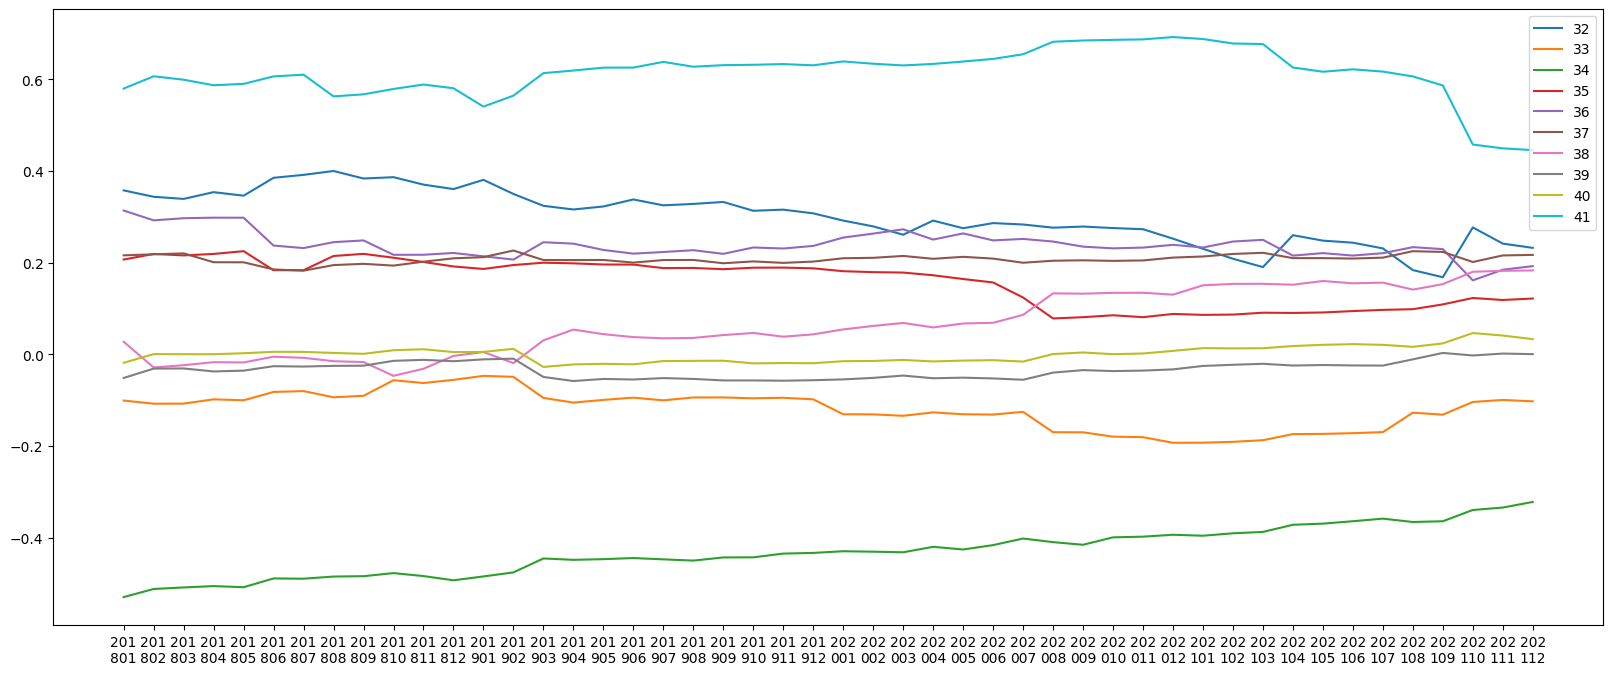

In [346]:
###绘图###
x = omega_Shrink_df_min.index.astype(str)
x=x.values.tolist()
print(type(x[1]))
for i in range(len(x)):
    x[i]=x[i][:3]+'\n'+x[i][3:]
plt.figure(figsize=(20,8))
names = {}
for j in range(10):
    names[f'y{j + 1}'] = omega_Shrink_df_min[omega_Shrink_df_min.columns[j]].values.tolist()
    plt.plot(x, names[f'y{j + 1}'],label = omega_Shrink_df_min.columns[j])
    plt.legend()
    plt.grid()

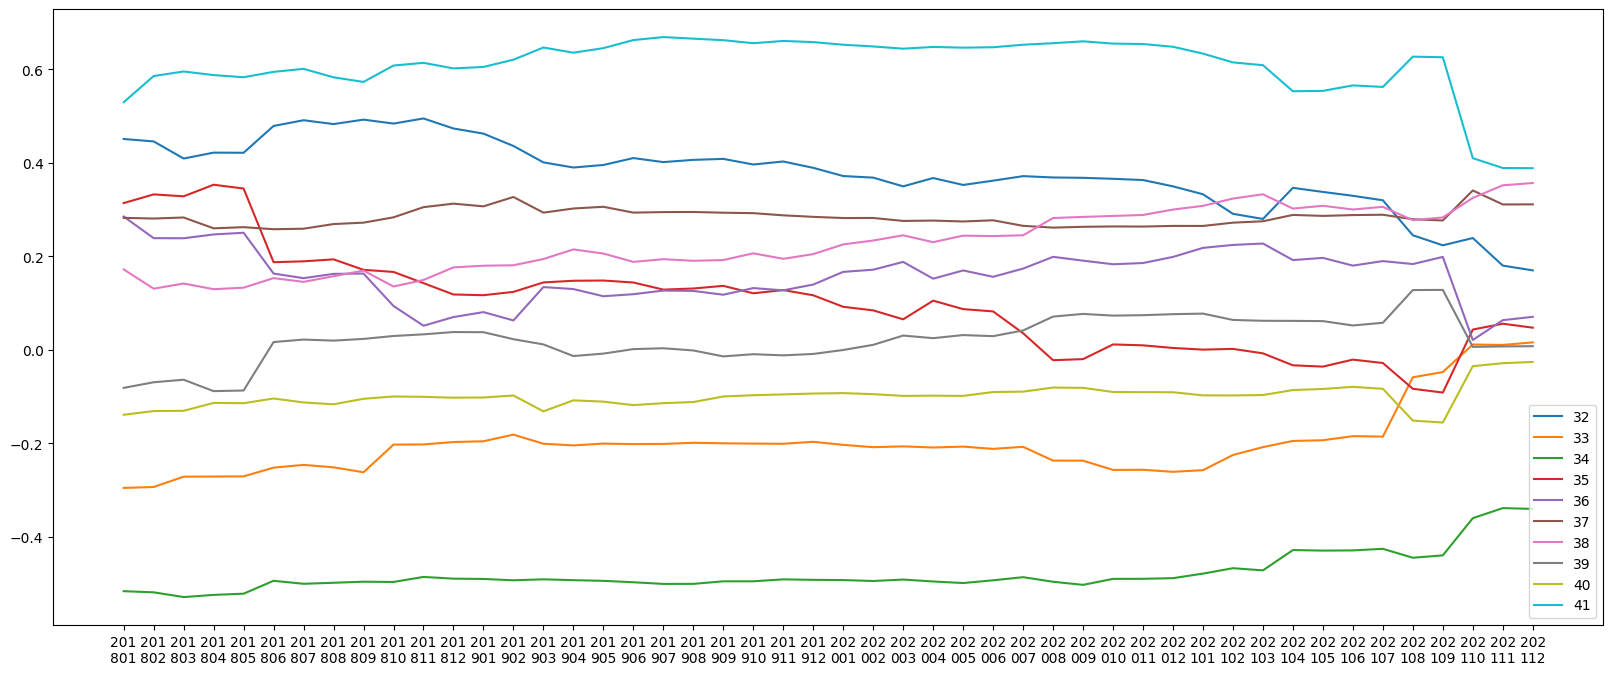

In [347]:
x_max = omega_Shrink_df_max.index.astype(str)
x_max=x_max.values.tolist()
for i in range(len(x_max)):
    x_max[i]=x_max[i][:3]+'\n'+x_max[i][3:]
plt.figure(figsize=(20,8))
names = {}
for j in range(10):
    names[f'y{j + 1}'] = omega_Shrink_df_max[omega_Shrink_df_max.columns[j]].values.tolist()
    plt.plot(x_max, names[f'y{j + 1}'],label = omega_Shrink_df_max.columns[j])
    plt.legend()
    plt.grid()

['201\n801', '201\n802', '201\n803', '201\n804', '201\n805', '201\n806', '201\n807', '201\n808', '201\n809', '201\n810', '201\n811', '201\n812', '201\n901', '201\n902', '201\n903', '201\n904', '201\n905', '201\n906', '201\n907', '201\n908', '201\n909', '201\n910', '201\n911', '201\n912', '202\n001', '202\n002', '202\n003', '202\n004', '202\n005', '202\n006', '202\n007', '202\n008', '202\n009', '202\n010', '202\n011', '202\n012', '202\n101', '202\n102', '202\n103', '202\n104', '202\n105', '202\n106', '202\n107', '202\n108', '202\n109', '202\n110', '202\n111', '202\n112']
['201\n801', '201\n802', '201\n803', '201\n804', '201\n805', '201\n806', '201\n807', '201\n808', '201\n809', '201\n810', '201\n811', '201\n812', '201\n901', '201\n902', '201\n903', '201\n904', '201\n905', '201\n906', '201\n907', '201\n908', '201\n909', '201\n910', '201\n911', '201\n912', '202\n001', '202\n002', '202\n003', '202\n004', '202\n005', '202\n006', '202\n007', '202\n008', '202\n009', '202\n010', '202\n011', '2

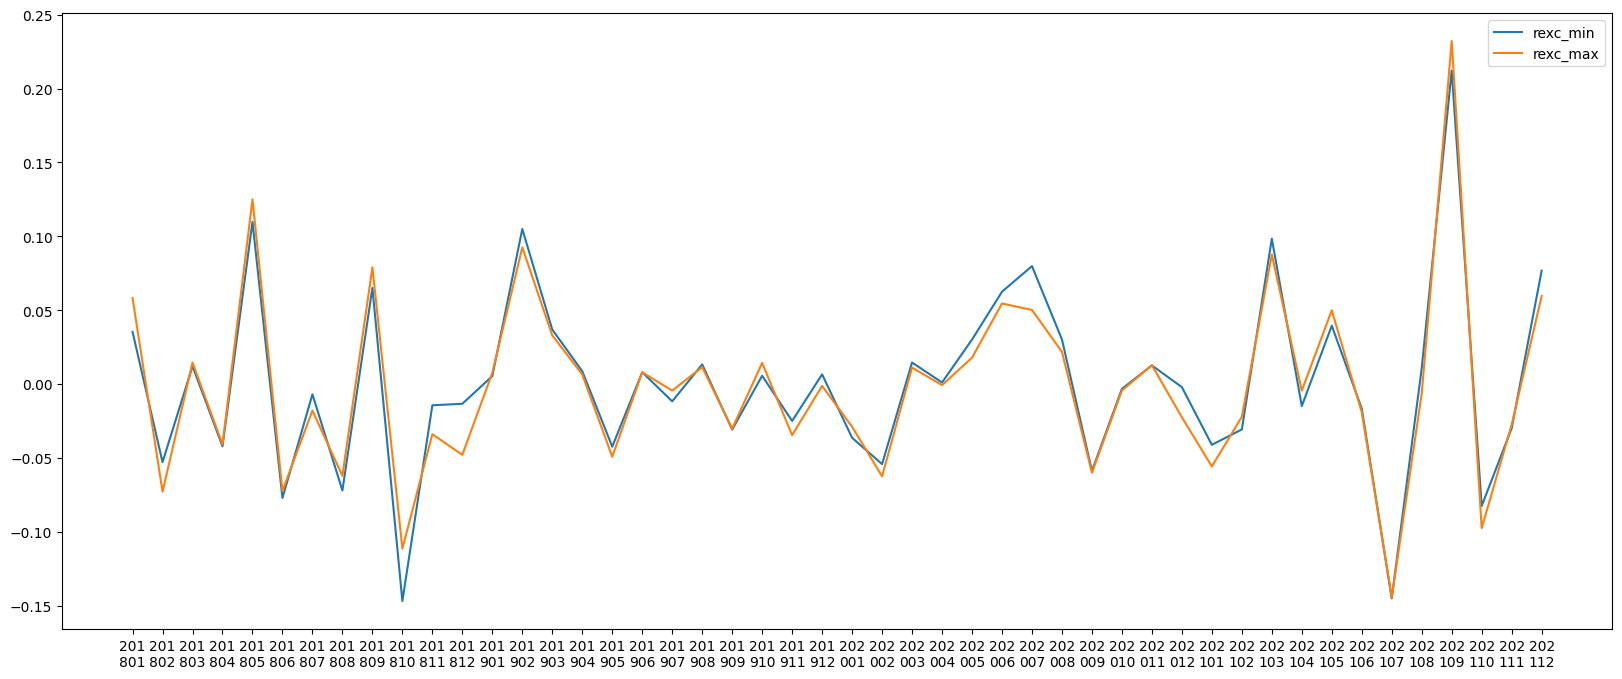

In [351]:
x = rexc_df['yearmonth'].astype(str)
x=x.values.tolist()
for i in range(len(x)):
    x[i]=x[i][:3]+'\n'+x[i][3:]
plt.figure(figsize=(20,8))
names = {}
for j in range(2):
    names[f'y{j + 1}'] = rexc_df[rexc_df.columns[j]].values.tolist()
    print(x)
    plt.plot(x, names[f'y{j + 1}'],label = rexc_df.columns[j])
    plt.legend()
    plt.grid()

In [ ]:
rexc32=r32-rf[1:]
rexc33=r33-rf[1:]
rexc34=r34-rf[1:]
rexc35=r35-rf[1:]
rexc36=r36-rf[1:]
rexc37=r37-rf[1:]
rexc38=r38-rf[1:]
rexc39=r39-rf[1:]
rexc40=r40-rf[1:]
rexc41=r41-rf[1:]
rexc32

In [ ]:
R=np.concatenate([rexc32[:,None],rexc33[:,None],rexc34[:,None],rexc35[:,None],rexc36[:,None],rexc37[:,None],rexc38[:,None],rexc39[:,None],rexc40[:,None],rexc41[:,None]],axis=1)
R

In [ ]:
Cov_Sample=np.mat(np.cov(R,rowvar=False))##将列作为一个变量
Cov_Sample

In [ ]:
X = np.mat(np.concatenate([np.ones((len(mkt)-1, 1)), mkt[1:, None]], axis=1))
X

In [ ]:
Y = np.mat(R)
AB_hat = (X.T*X).I*(X.T*Y)
ALPHA = AB_hat[0]
BETA = AB_hat[1]
RESD = Y - X*AB_hat
covfactor = np.cov(mkt[1:])
covresidual = np.diag(np.diag(np.cov(RESD, rowvar=False)))
Cov_Factor = BETA.T*covfactor*BETA + covresidual
Cov_Factor

In [ ]:
c = 0.5
Cov_Shrink = c*Cov_Sample + (1-c)*Cov_Factor
Cov_Shrink

In [ ]:
uhat = np.mean(R, axis=0)
uhat

In [ ]:

A = np.mat(np.concatenate([uhat[:, None], np.ones((len(uhat), 1))], axis=1)).T
A

In [ ]:

up = np.mean(uhat)
up

In [ ]:
b = np.mat(np.array([up, 1])[:, None])

In [ ]:
Cov_Sample

In [ ]:
diagnal_average=np.mean(Cov_Sample.diagonal())
diagnal_average
# for i in range(10):
#     sum

In [ ]:

sum_notdiag=0
for i in range(10):
    for j in range(10):
        if i!=j:
            sum_notdiag=sum_notdiag+Cov_Sample[i,j]
sum_notdiag
average_notdiag=sum_notdiag/90
average_notdiag

In [ ]:
Cov_Const=Cov_Sample
for i in range(10):
    for j in range(10):
        if i==j:
            Cov_Const[i,j]=diagnal_average
        else:
            Cov_Const[i,j]=average_notdiag
Cov_Const

In [ ]:
c_new=min(((1-2/10)*(Cov_Sample**2).trace()+Cov_Sample.trace()**2)/((len(rexc32)-2/10)*((Cov_Sample**2).trace()-Cov_Sample.trace()**2/10)),1)
c_new=c_new[0,0]
c_new

In [ ]:
Cov_Shrink = (1-c_new)*Cov_Sample + c_new*Cov_Factor
Cov_Shrink